<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA_SCIENCE/blob/master/An%C3%A1lise_Portif%C3%B3lio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ESTUDO ESTATÍSTICO PORTIFÓLIO ÍNDICE DAY TRADING


In [1]:
!pip install pandas==0.25.3

In [2]:
import pandas as pd
pd.__version__

'0.25.3'

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [4]:
!pip install pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


##DATAFRAME

In [0]:
!pip install -U -q pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
df = pd.read_excel("/content/drive/My Drive/DataFrames/PORTIFÓLIO INDICE DAY TRANDING.xlsx", parse_dates= True)
df

,Unnamed: 0,FFFD,MM9,TIME,WRP,FFFD1,MM92,TIME3,WRP4,PORTIFÓLIO5,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015.05.12 10:00:07,0.00,NaN,NaN,NaN,0.00,0.0,0.00,0.00,0.00,2015.01.01 00:00:00,"10 000,00"
2,2015.05.12 10:19:40,45.00,NaN,NaN,NaN,45.00,0.0,0.00,0.00,45.00,2015.05.12 10:00:07,"10 000,00"
3,2015.05.12 13:15:00,74.00,NaN,NaN,NaN,119.00,0.0,0.00,0.00,119.00,2015.05.12 10:19:40,"10 045,00"
4,2015.05.12 13:15:12,-1.25,NaN,NaN,NaN,117.75,0.0,0.00,0.00,117.75,2015.05.12 13:15:00,"10 119,00"
...,...,...,...,...,...,...,...,...,...,...,...,...
16149,2020.05.06 15:50:40,124.00,NaN,NaN,NaN,26611.00,19368.0,20805.25,14521.25,81305.50,NaN,NaN
16150,2020.05.06 16:30:00,73.00,NaN,NaN,NaN,26684.00,19368.0,20805.25,14521.25,81378.50,NaN,NaN
16151,2020.05.06 16:30:12,-1.25,NaN,NaN,NaN,26682.75,19368.0,20805.25,14521.25,81377.25,NaN,NaN
16152,2020.05.06 16:45:00,NaN,NaN,NaN,-208.00,26682.75,19368.0,20805.25,14313.25,81169.25,NaN,NaN


In [0]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df['Data'] = df['Unnamed: 0'].dt.strftime('%Y-%m-%d')
df['Hora'] = df['Unnamed: 0'].dt.strftime('%H:%M:%S')

In [9]:
df

,Unnamed: 0,FFFD,MM9,TIME,WRP,FFFD1,MM92,TIME3,WRP4,PORTIFÓLIO5,Unnamed: 10,Unnamed: 11,Data,Hora
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,2015-05-12 10:00:07,0.00,NaN,NaN,NaN,0.00,0.0,0.00,0.00,0.00,2015.01.01 00:00:00,"10 000,00",2015-05-12,10:00:07
2,2015-05-12 10:19:40,45.00,NaN,NaN,NaN,45.00,0.0,0.00,0.00,45.00,2015.05.12 10:00:07,"10 000,00",2015-05-12,10:19:40
3,2015-05-12 13:15:00,74.00,NaN,NaN,NaN,119.00,0.0,0.00,0.00,119.00,2015.05.12 10:19:40,"10 045,00",2015-05-12,13:15:00
4,2015-05-12 13:15:12,-1.25,NaN,NaN,NaN,117.75,0.0,0.00,0.00,117.75,2015.05.12 13:15:00,"10 119,00",2015-05-12,13:15:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16149,2020-05-06 15:50:40,124.00,NaN,NaN,NaN,26611.00,19368.0,20805.25,14521.25,81305.50,NaN,NaN,2020-05-06,15:50:40
16150,2020-05-06 16:30:00,73.00,NaN,NaN,NaN,26684.00,19368.0,20805.25,14521.25,81378.50,NaN,NaN,2020-05-06,16:30:00
16151,2020-05-06 16:30:12,-1.25,NaN,NaN,NaN,26682.75,19368.0,20805.25,14521.25,81377.25,NaN,NaN,2020-05-06,16:30:12
16152,2020-05-06 16:45:00,NaN,NaN,NaN,-208.00,26682.75,19368.0,20805.25,14313.25,81169.25,NaN,NaN,2020-05-06,16:45:00


In [0]:
df.drop(["Unnamed: 0", "Hora"], axis=1, inplace=True)

In [11]:
df

,FFFD,MM9,TIME,WRP,FFFD1,MM92,TIME3,WRP4,PORTIFÓLIO5,Unnamed: 10,Unnamed: 11,Data
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,0.00,NaN,NaN,NaN,0.00,0.0,0.00,0.00,0.00,2015.01.01 00:00:00,"10 000,00",2015-05-12
2,45.00,NaN,NaN,NaN,45.00,0.0,0.00,0.00,45.00,2015.05.12 10:00:07,"10 000,00",2015-05-12
3,74.00,NaN,NaN,NaN,119.00,0.0,0.00,0.00,119.00,2015.05.12 10:19:40,"10 045,00",2015-05-12
4,-1.25,NaN,NaN,NaN,117.75,0.0,0.00,0.00,117.75,2015.05.12 13:15:00,"10 119,00",2015-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...
16149,124.00,NaN,NaN,NaN,26611.00,19368.0,20805.25,14521.25,81305.50,NaN,NaN,2020-05-06
16150,73.00,NaN,NaN,NaN,26684.00,19368.0,20805.25,14521.25,81378.50,NaN,NaN,2020-05-06
16151,-1.25,NaN,NaN,NaN,26682.75,19368.0,20805.25,14521.25,81377.25,NaN,NaN,2020-05-06
16152,NaN,NaN,NaN,-208.00,26682.75,19368.0,20805.25,14313.25,81169.25,NaN,NaN,2020-05-06


In [12]:
df['Data'] = pd.to_datetime(df['Data'])
df.set_index("Data", inplace=True)
df

,FFFD,MM9,TIME,WRP,FFFD1,MM92,TIME3,WRP4,PORTIFÓLIO5,Unnamed: 10,Unnamed: 11
Data,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-12,0.00,NaN,NaN,NaN,0.00,0.0,0.00,0.00,0.00,2015.01.01 00:00:00,"10 000,00"
2015-05-12,45.00,NaN,NaN,NaN,45.00,0.0,0.00,0.00,45.00,2015.05.12 10:00:07,"10 000,00"
2015-05-12,74.00,NaN,NaN,NaN,119.00,0.0,0.00,0.00,119.00,2015.05.12 10:19:40,"10 045,00"
2015-05-12,-1.25,NaN,NaN,NaN,117.75,0.0,0.00,0.00,117.75,2015.05.12 13:15:00,"10 119,00"
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-06,124.00,NaN,NaN,NaN,26611.00,19368.0,20805.25,14521.25,81305.50,NaN,NaN
2020-05-06,73.00,NaN,NaN,NaN,26684.00,19368.0,20805.25,14521.25,81378.50,NaN,NaN
2020-05-06,-1.25,NaN,NaN,NaN,26682.75,19368.0,20805.25,14521.25,81377.25,NaN,NaN


In [0]:
df["1"] = df["PORTIFÓLIO5"].pct_change()

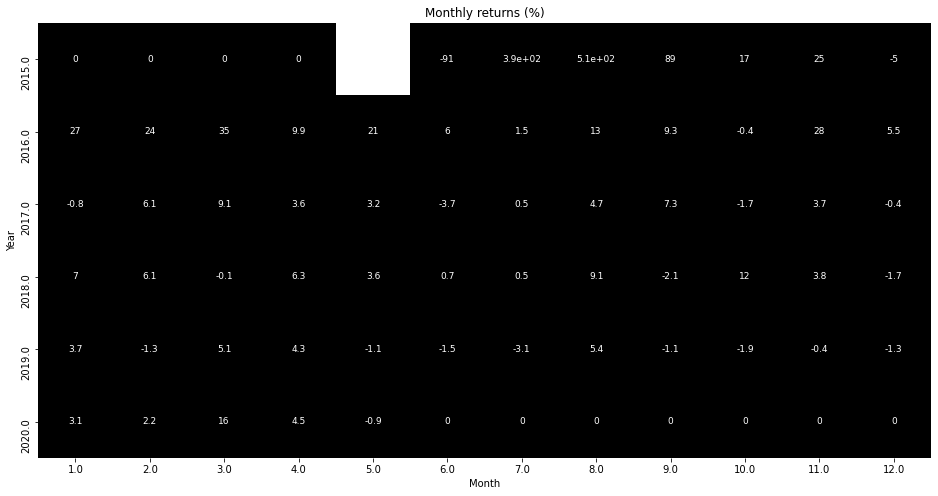

In [14]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_monthly_returns_heatmap(df["1"], ax=ax1)
plt.show()


In [15]:
df = pd.read_excel("/content/drive/My Drive/DataFrames/teste1.xlsx", parse_dates= True, decimal=',', thousands='.')
df

,data,PORTIFÓLIO
0,2015.05.12 10:00:07,0.00
1,2015.05.12 10:19:40,45.00
2,2015.05.12 13:15:00,119.00
3,2015.05.12 13:15:12,117.75
4,2015.05.13 09:15:07,117.75
...,...,...
16148,2020.05.06 15:50:40,81305.50
16149,2020.05.06 16:30:00,81378.50
16150,2020.05.06 16:30:12,81377.25
16151,2020.05.06 16:45:00,81169.25


In [0]:
#for coluna in ['capital']:
 # df[coluna] = df[coluna].str.replace('.', '')                    #Retirar os pontos dos milhares.
  #df[coluna] = df[coluna].str.replace(',', '.')                   #susbstituir a vírgula por ponto.
  #df[coluna] = df[coluna].str.rstrip('%').astype('float') / 100   #Tirar o % e converter os valores em pontos float.

In [17]:
df['data'] = pd.to_datetime(df['data'])
df['Data'] = df['data'].dt.strftime('%Y-%m-%d')
df['Hora'] = df['data'].dt.strftime('%H:%M:%S')
df

,data,PORTIFÓLIO,Data,Hora
0,2015-05-12 10:00:07,0.00,2015-05-12,10:00:07
1,2015-05-12 10:19:40,45.00,2015-05-12,10:19:40
2,2015-05-12 13:15:00,119.00,2015-05-12,13:15:00
3,2015-05-12 13:15:12,117.75,2015-05-12,13:15:12
4,2015-05-13 09:15:07,117.75,2015-05-13,09:15:07
...,...,...,...,...
16148,2020-05-06 15:50:40,81305.50,2020-05-06,15:50:40
16149,2020-05-06 16:30:00,81378.50,2020-05-06,16:30:00
16150,2020-05-06 16:30:12,81377.25,2020-05-06,16:30:12
16151,2020-05-06 16:45:00,81169.25,2020-05-06,16:45:00


In [18]:
df.drop(["data", "Hora"], axis=1, inplace=True)
df

,PORTIFÓLIO,Data
0,0.00,2015-05-12
1,45.00,2015-05-12
2,119.00,2015-05-12
3,117.75,2015-05-12
4,117.75,2015-05-13
...,...,...
16148,81305.50,2020-05-06
16149,81378.50,2020-05-06
16150,81377.25,2020-05-06
16151,81169.25,2020-05-06


In [19]:
df['Data'] = pd.to_datetime(df['Data'])

df.set_index(["Data"], inplace =True)

df.iloc[0] = 1
df

,PORTIFÓLIO
Data,
2015-05-12,1.00
2015-05-12,45.00
2015-05-12,119.00
2015-05-12,117.75
2015-05-13,117.75
...,...
2020-05-06,81305.50
2020-05-06,81378.50
2020-05-06,81377.25


In [24]:
retorno = df["PORTIFÓLIO"].pct_change()
retorno

Data
2015-05-12          NaN
2015-05-12    44.000000
2015-05-12     1.644444
2015-05-12    -0.010504
2015-05-13     0.000000
                ...    
2020-05-06     0.001527
2020-05-06     0.000898
2020-05-06    -0.000015
2020-05-06    -0.002556
2020-05-06    -0.000003
Name: PORTIFÓLIO, Length: 16153, dtype: float64

In [25]:
retorno_acumulado = (1+retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

Data
2015-05-12        1.00
2015-05-12       45.00
2015-05-12      119.00
2015-05-12      117.75
2015-05-13      117.75
                ...   
2020-05-06    81305.50
2020-05-06    81378.50
2020-05-06    81377.25
2020-05-06    81169.25
2020-05-06    81169.00
Name: PORTIFÓLIO, Length: 16153, dtype: float64

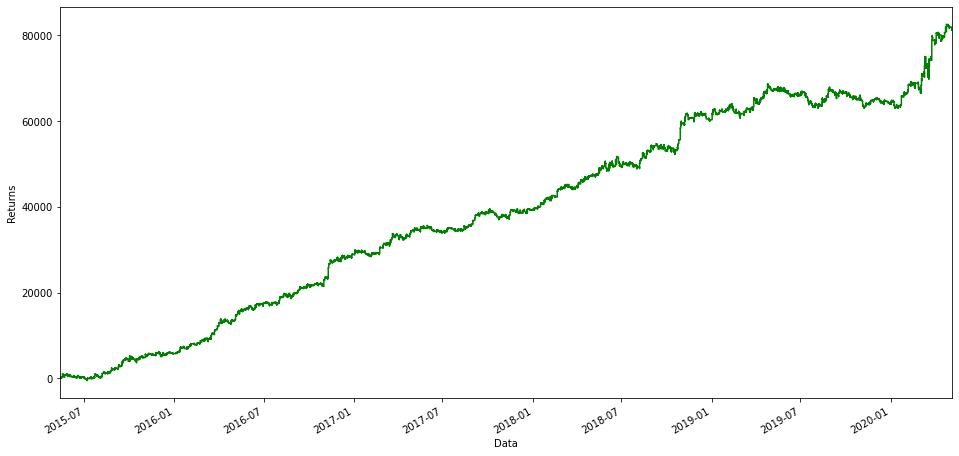

In [26]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_returns(retorno_acumulado)
plt.show()

TypeError: ignored

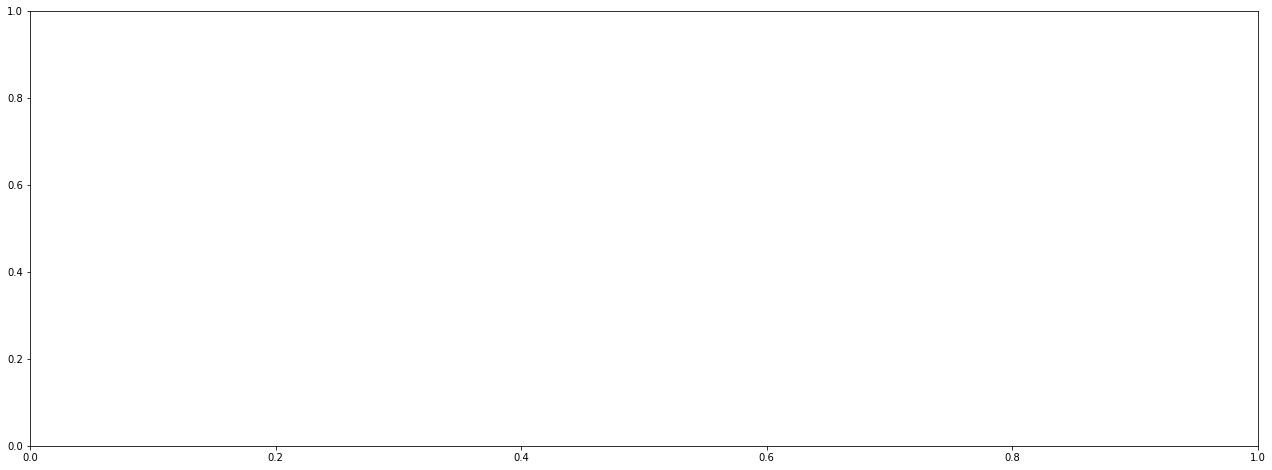

In [39]:
fig, ax = plt.subplots(figsize=(22,8))
pf.create_perf_attrib_tear_sheet(retorno_acumulado, benchmark_rets = retorno_acumulado, ax=ax);
plt.tight_layout();